In [2]:
cd D:\Project\diffusiontrack_MOT\Code\Dataset4Huy

D:\Project\diffusiontrack_MOT\Code\Dataset4Huy


In [28]:
from easydict import EasyDict
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)

# Initialize args with parameters using EasyDict
args = EasyDict({
    "path_data": r"DanceTrack",
    "k_frame": 4,
    "batch_size": 4,
    "preprocess_workers": 0,
    "interval": 4,
    "train": True,
    "val": True,
    "test": True,
    "test_index": 64,
})


Using device: cuda


In [29]:
!python preprocessing.py --seq_root "DanceTrack" --train --val

train
dancetrack0002
dancetrack0016
dancetrack0020
dancetrack0027
dancetrack0029
dancetrack0032
dancetrack0033
dancetrack0044
dancetrack0045
dancetrack0051
val
dancetrack0005
dancetrack0010
dancetrack0018
dancetrack0019
dancetrack0026
dancetrack0034
dancetrack0043
dancetrack0058
dancetrack0073
dancetrack0081
dancetrack0094


In [35]:
from DiffMOTDataset import DiffMOTDataset, DiffMOTDataLoader
from visualization import original_shape, visualize_bbox

label_root = args.path_data + "/trackers_gt_t"

if args.train:
    label_path = label_root + "/train"
    print("Train Dataset: " + label_path)
    train_dataset = DiffMOTDataset(path=label_path, config=args)
    train_data_loader = DiffMOTDataLoader(train_dataset, config=args)
    print("len: ", len(train_dataset))

if args.val:
    print("="*80)
    label_path = label_root + "/val"
    print("Validation Dataset: " + label_path)
    val_dataset = DiffMOTDataset(path=label_path, config=args)
    val_data_loader = DiffMOTDataLoader(val_dataset, config=args)
    print("len: ", len(val_dataset))


Train Dataset: DanceTrack/trackers_gt_t/train
len:  102379
Validation Dataset: DanceTrack/trackers_gt_t/val
len:  97405


Example dataset:
{'cur_gt': array([0.00000e+00, 9.50000e+01, 3.03646e-01, 6.29167e-01, 5.20830e-02,
       2.63889e-01, 1.00000e+00, 1.92000e+03, 1.08000e+03], dtype=float32), 'cur_bbox': array([0.303646, 0.629167, 0.052083, 0.263889], dtype=float32), 'condition': array([[ 3.0520800e-01,  6.2500000e-01,  5.0000001e-02,  2.7407399e-01,
        -1.3020039e-03,  1.3890266e-03,  1.5619993e-03,  4.6299994e-03],
       [ 3.0859399e-01,  6.2592602e-01,  5.0521001e-02,  2.7592599e-01,
         3.3859909e-03,  9.2601776e-04,  5.2100047e-04,  1.8520057e-03],
       [ 3.0885401e-01,  6.2824100e-01,  4.3749999e-02,  2.7129599e-01,
         2.6002526e-04,  2.3149848e-03, -6.7710020e-03, -4.6299994e-03],
       [ 3.0703101e-01,  6.2870401e-01,  4.9479000e-02,  2.6666701e-01,
        -1.8230081e-03,  4.6300888e-04,  5.7290010e-03, -4.6289861e-03]],
      dtype=float32), 'delta_bbox': array([-0.00338501,  0.00046301,  0.002604  , -0.00277799], dtype=float32), 'width': 1920.0, 'height': 1080.0, 'image_

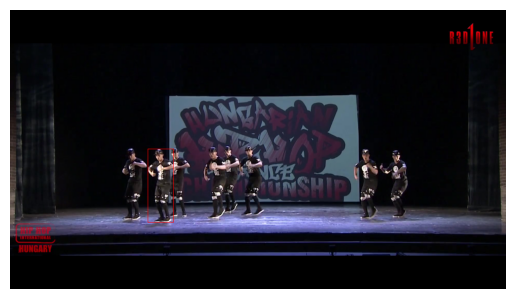

ORG


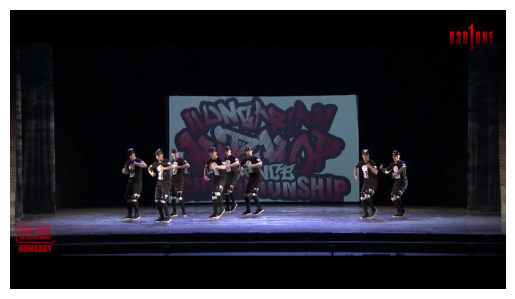

In [ ]:
print("Example dataset:")
index = 89
item = train_dataset[index]
print(item)

bbox = original_shape(item['cur_bbox'], item['width'], item['height'])
image_path = item['image_path']

print("ORG")
train_dataset.show_image(index)

print("BOX")
visualize_bbox(image_path, bbox)
